<a href="https://colab.research.google.com/github/urosgodnov/juypterNotebooks/blob/main/DataMining/Machine_Learning_with_Python_2_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Using Python to implement machine learning process
by dr. Uros Godnov**

# Data exploration

In [ ]:
import pandas as pd

from google.colab import drive
import sys
# Mount google drive
drive.mount('/content/gdrive')
# Changing path dirctory
sys.path.append('/content/gdrive/MyDrive/Google_Colab_modules')

import sweetviz as sv
import ydata_profiling as ydp

In [ ]:
df=pd.read_csv("https://raw.githubusercontent.com/urosgodnov/datasets/refs/heads/master/laptop_price_with_missing_values.csv")


In [ ]:
df.head()

**changing pandas behavior**

In [ ]:
pd.set_option('display.max_rows', 20)         # Show up to 20 rows
pd.set_option('display.max_columns', 10)      # Show up to 10 columns
pd.set_option('display.precision', 3)         # Set float precision to 3 decimals
pd.set_option('display.max_colwidth', 50)     # Limit column width to 50 characters


## Basic data overview

**datatable formatter**

In [ ]:
from google.colab import data_table
data_table.enable_dataframe_formatter()

In [ ]:
df.head()

In [ ]:
df.info()

In [ ]:
## displying data types
df.dtypes

In [ ]:
df.describe() # basic descriptive statistics

In [ ]:
# displaying missing values statistics
df.isnull().sum()

In [ ]:
## displaying skewness
df.select_dtypes(include="number").skew()

In [ ]:
## displying frequencies
df['Company'].value_counts()

In [ ]:
# displying histograms
df.hist(figsize=(15,10))

### Datetime with pandas

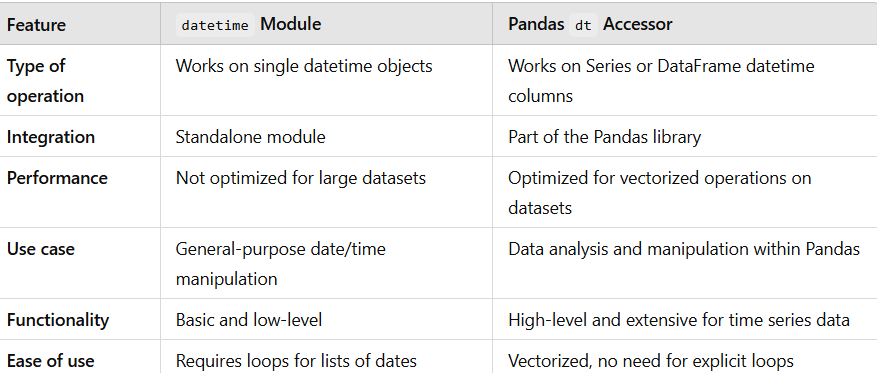

In [ ]:
import pandas as pd

# Your DataFrame
data = {
    'Full Name': ['Alice Smith', 'Bob Johnson', 'Charlie Brown', 'David Wilson', 'Eve Adams'],
    'Department': ['HR', 'IT', 'Finance', 'IT', 'Marketing'],
    'Start Date': ['2020-01-15', '2019-06-01', '2021-03-20', '2018-12-11', '2022-07-15'],
    'End Date': ['1/10/2022', '6/15/2023', '10/1/2022', '12/31/2021', '8/1/2023'],
    'Employee ID': ['E123', 'E456', 'E789', 'E012', 'E345'],
    'Email': ['alice.smith@company.com', 'bob.johnson@company.com', 'charlie.brown@company.com', 'david.wilson@company.com', 'eve.adams@company.com']
}

string_datetime_df = pd.DataFrame(data)

# Convert 'Start Date' to datetime
string_datetime_df['Start Date'] = pd.to_datetime(string_datetime_df['Start Date'])

# Access the dt accessor and list its methods
methods = [method for method in dir(string_datetime_df['Start Date'].dt) if not method.startswith('_')]
list(methods)

In [ ]:
# Parsing string to datetime
# pd.to_datetime() with errors='coerce' tries to understand each date. If it can, it puts the date on a calendar. If it can't,
# it throws the unreadable date into a separate "invalid" pile (NaT)
string_datetime_df['End Date'] = pd.to_datetime(string_datetime_df['End Date'], errors='coerce')

string_datetime_df

In [ ]:
# Extract year, month, and day from 'Start Date'
string_datetime_df['Start Year'] = string_datetime_df['Start Date'].dt.year
string_datetime_df['Start Month'] = string_datetime_df['Start Date'].dt.month
string_datetime_df['Start Day'] = string_datetime_df['Start Date'].dt.day

string_datetime_df

In [ ]:
# Add a column for the day of the week as a string
string_datetime_df['Day of Week'] = string_datetime_df['Start Date'].dt.day_name()

string_datetime_df


In [ ]:
# Calculate days since start
string_datetime_df['Days Since Start'] = (pd.Timestamp('today') - string_datetime_df['Start Date']).dt.days

string_datetime_df

In [ ]:
# Create a column indicating if 'Start Date' was on a weekend
# day of the week as integers (Monday=0, Sunday=6)

string_datetime_df['Started on Weekend'] = string_datetime_df['Start Date'].dt.dayofweek >= 5

string_datetime_df

In [ ]:
# Format 'Start Date' as 'Month-Year'
string_datetime_df['Start Month-Year'] = string_datetime_df['Start Date'].dt.strftime('%B-%Y')

string_datetime_df

In [ ]:
# Add a column for months since start
string_datetime_df['Months Since Start'] = ((pd.Timestamp('today').year - string_datetime_df['Start Date'].dt.year) * 12 +
                                            (pd.Timestamp('today').month - string_datetime_df['Start Date'].dt.month))

string_datetime_df

In [ ]:
# Calculate months between 'Start Date' and 'End Date' using a UDF
from dateutil.relativedelta import relativedelta
def calculate_months_between_dates(row):
    delta = relativedelta(row['End Date'], row['Start Date'])
    #print(vars(delta))
    return delta.years * 12 + delta.months

string_datetime_df['Months Between Start and End'] = string_datetime_df.apply(calculate_months_between_dates, axis=1)

string_datetime_df

In [ ]:
# Additional Example: Handling Time Intervals
time_data = {
    'Event': ['Login', 'Logout', 'Break', 'Meeting', 'Presentation'],
    'Timestamp': ['2023-09-21 08:15:00', '2023-09-21 10:45:00', '2023-09-21 11:05:00', '2023-09-21 14:20:00', '2023-09-21 16:50:00']
}

# Create a new DataFrame with datetime data
time_df = pd.DataFrame(time_data)
time_df['Timestamp'] = pd.to_datetime(time_df['Timestamp'])

time_df

In [ ]:
# Create a column for time intervals (2-hour bins)
# The hour // 2 performs integer division by 2, grouping hours into blocks of 2 (e.g., 0–1, 2–3, 4–5)
# Multiplying by 2 gives the start of the interval. For example:
# If hour = 13, then 13 // 2 = 6, and 6 * 2 = 12. So, interval_start = 12.
# The :02d ensures the hour is zero-padded to two digits (e.g., 08 instead of 8)

def assign_time_interval(timestamp):
    hour = timestamp.hour
    interval_start = (hour // 2) * 2  # Start of the interval
    interval_end = interval_start + 2  # End of the interval
    return f"{interval_start:02d}:00 - {interval_end:02d}:00"

time_df['Time Interval'] = time_df['Timestamp'].apply(assign_time_interval)

time_df

In [ ]:
# problems with different local settings, e.g. German month names
# changing locale on google colab is not straightforward
# MAC: en_US.UTF-8, de_DE.UTF-8; windows: deu


### Task

In [ ]:
# Load parquet file from nycTaxi for July, 2024
# Analyze which combination of days (weekday name) and hour intervals (by 2 hours)
# has the highest frequency

nyc_taxi_parquet = pd.read_parquet('https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2024-07.parquet')
nyc_taxi_parquet.head()

### Solution

In [ ]:
def assign_time_interval(timestamp):
    hour = timestamp.hour
    interval_start = (hour // 2) * 2  # Start of the interval
    interval_end = interval_start + 2  # End of the interval
    return f"{interval_start:02d}:00 - {interval_end:02d}:00"

nyc_taxi_parquet['time_interval'] = nyc_taxi_parquet['tpep_pickup_datetime'].apply(assign_time_interval)
nyc_taxi_parquet['weekday_name'] = nyc_taxi_parquet['tpep_pickup_datetime'].dt.day_name()

In [ ]:
nyc_taxi_parquet[["weekday_name","time_interval"]].head()

In [ ]:
nyc_taxi_parquet.groupby(["weekday_name","time_interval"]). \
size().reset_index(name="count").sort_values("count", ascending=False).head()

### String manipulation with pandas

In [ ]:
data = {
    'Full Name': ['Alice Smith', 'Bob Johnson', 'Charlie Brown', 'David Wilson', 'Eve Adams'],
    'Department': ['HR', 'IT', 'Finance', 'IT', 'Marketing'],
    'Start Date': ['2020-01-15', '2019-06-01', '2021-03-20', '2018-12-11', '2022-07-15'],
    'End Date': ['1/10/2022', '6/15/2023', '10/1/2022', '12/31/2021', '8/1/2023'],
    'Employee ID': ['E123', 'E456', 'E789', 'E012', 'E345'],
    'Email': ['alice.smith@company.com', 'bob.johnson@company.com', 'charlie.brown@company.com', 'david.wilson@company.com', 'eve.adams@company.com']
}

# Create the DataFrame
string_datetime_df = pd.DataFrame(data)

In [ ]:
# Split 'Full Name' into 'First Name' and 'Last Name'

string_datetime_df[['First Name', 'Last Name']] = string_datetime_df['Full Name'].str.split(' ', expand=True)

string_datetime_df

In [ ]:
data1 = {
    "Full Name": ["John Doe", "Jane A. Smith", "Bob Johnson"],
    "Age": [28, 34, 45],
}

df = pd.DataFrame(data1)

split_df = df["Full Name"].str.split(" ", expand=True)
print(split_df)

In [ ]:
# First name to upper, Lastname to lower
string_datetime_df['Upper First Name'] = string_datetime_df['First Name'].str.upper()
string_datetime_df['Lower Last Name'] = string_datetime_df['Last Name'].str.lower()

string_datetime_df

In [ ]:
# Extract domain names from 'Email'

string_datetime_df['Email Domain'] = string_datetime_df['Email'].str.split('@').str[1]

string_datetime_df

In [ ]:
# Check if 'Email' contains 'company.com'
string_datetime_df['Is Company Email'] = string_datetime_df['Email'].str.contains('company.com')

string_datetime_df

In [ ]:
# Extract numeric part of 'Employee ID'
# regular expressions
string_datetime_df['Employee Number'] = string_datetime_df['Employee ID'].str.extract('(\d+)')

string_datetime_df

In [ ]:
# Replace spaces in 'Full Name' with underscores
string_datetime_df['Full Name Underscore'] = string_datetime_df['Full Name'].str.replace(' ', '_', regex=False)

string_datetime_df

**Regular expressions (advanced)**

- String Accessor (.str):

In Pandas, string methods are accessed via the .str accessor on a Series or column.

- Regex Parameter:

Many string methods (e.g., .replace, .contains, .split, .extract) accept a regex=True/False parameter (often defaulting to True).

- Common Methods:

  - str.contains(): Check if a pattern is contained within each string.
  - str.replace(): Replace substrings that match a pattern.
  - str.split(): Split each string by a pattern.
  - str.extract() / str.extractall(): Capture groups from each string using a regex.
  - str.match(), str.fullmatch(), str.findall(): Various ways to match or find patterns.

- Capture Groups:

Parentheses ( ... ) define capture groups in your regex. str.extract() returns these groups as new columns.

- Flags:

You can pass regex flags like re.IGNORECASE (or re.I) by specifying the flags= parameter, making your search case-insensitive, etc.

- Performance:

Regex can be slower with very large Series. For performance-critical tasks, try to optimize or avoid overly complex patterns.


In [ ]:
import re

df = pd.DataFrame({
    "text": [
        "Hello World!",
        "Email me at example123@test.com",
        "Numbers: 12345, 6789, and 42.",
        "No digits here",
        "MixedCaseString",
        "Line with 2    spaces",
        "Another line with tabs\tand spaces",
        "The price is $49.99",
        "Visit https://docs.python.org",
        None  # Missing value
    ]
})

df

In [ ]:
# Pattern: Any sequence of digits (\d+)
df["has_digits"] = df["text"].str.contains(r"\d+", regex=True)

df

In [ ]:
# Pattern: The string should start with "Hello"
df["starts_with_hello"] = df["text"].str.match(r"^Hello")

df

In [ ]:
# Pattern: Only digits for the entire string
df["entirely_digits"] = df["text"].str.fullmatch(r"\d+")

df

In [ ]:
# Pattern: Remove all digits
df["no_digits"] = df["text"].str.replace(r"\d+", "", regex=True)

df

In [ ]:
# Split on any sequence of whitespace
split_df = df["text"].str.split(r"\s+", expand=True)

split_df

In [ ]:
# Pattern: all digit sequences
df["all_numbers"] = df["text"].str.findall(r"\d+")

df

In [ ]:
# Pattern: All digit groups, capturing each sequence
extracted = df["text"].str.extractall(r"(\d+)")

extracted

In [ ]:
# Pattern: Count how many digits in each string
df["digit_count"] = df["text"].str.count(r"\d")

df

In [ ]:
df["contains_hello_case_insensitive"] = df["text"].str.contains(
    r"hello",
    flags=re.IGNORECASE,
    regex=True
)

df

In [ ]:
# Check if string ends with ".org" using a regex pattern with contains
df["ends_with_org"] = df["text"].str.contains(r"\.org$", regex=True)

df

### Task

In [ ]:
# Step 1: Create a sample DataFrame
df = pd.DataFrame({
    "full_name": [
        "John Doe",
        "Jane A. Smith",
        "   Bob  Johnson   ",  # extra spaces
        "Maria  de la Cruz",
        "Tricky   Name   Test"
    ],
    "email": [
        "john.doe@example.com",
        "jane.smith@@some-domain.org",  # double '@'
        "bob.johnson@mail.com",
        "maria_cruz@example.es",
        None  # missing email
    ],
    "phone": [
        "+1(555)123-4567",
        "555-abc-7890",
        "(123) 456 7890 ext. 12",
        "5551234567",
        "???"
    ],
    "message": [
        "OrderID: #12345. Looking for new shoes.",
        "Hello, I'm interested in the summer sale. Order #6789.",
        "Need a refund on order #42. Product code: X-123-XY.",
        "Hola, about my last order #00123 and code: Y-99.",
        "No order here. Product code: Z-999-XX. Another code: A-1234-BB. #44444"
    ]
})

df

# Remove leading/trailing spaces and collapse multiple spaces into a single space. (str.strip())
# Split the cleaned name into up to three parts:
# - first_name
# - middle_name (optional)
# - last_name (if there are more than two parts, lump everything after the second split into last_name)
# Normalize phone Numbers:
#  - Extract a clean numeric version of the phone number in phone_clean (e.g., "15551234567").
#  - Remove parentheses, dashes, letters, spaces, etc. Possibly keep a leading + if relevant.
#  - Mark numbers that have fewer than 10 digits (after cleaning) as invalid in a new column phone_valid (ge).
# Extract Order IDs & Product Codes from message:
#  - Order IDs appear as #12345, #42, #00123, etc. Extract all occurrences from each message. Store them in a list in a column named order_ids.
#  - You can use df["message"].str.findall(...) with a pattern like r"#(\d+)".

### Solution

In [ ]:
# 1) Remove leading/trailing spaces
df["full_name_clean"] = df["full_name"].str.strip()

# 2) Collapse multiple spaces to one
df["full_name_clean"] = df["full_name_clean"].str.replace(r"\s+", " ", regex=True)

# 3) Split into up to three parts
names_split = df["full_name_clean"].str.split(" ", n=2, expand=True)
df["first_name"] = names_split[0]
df["middle_name"] = names_split[1]
df["last_name"] = names_split[2]

# Keep digits and optionally a leading '+'
df["phone_clean"] = df["phone"].str.replace(r"[^\d+]", "", regex=True)

# Check length (e.g., must be >= 10 digits)
df["phone_valid"] = df["phone_clean"].str.len().ge(10)

# Order IDs
df["order_ids"] = df["message"].str.findall(r"#(\d+)")

# Product Codes (simple pattern)
df["product_codes"] = df["message"].str.findall(r"[A-Za-z]-\d+-[A-Za-z]+")

## Automatic data exploration

- ydata_profiling (pandas_profiling)
- sweetviz

In [ ]:
ydp.ProfileReport(df)

In [ ]:
import sweetviz as sv

In [ ]:
# report = sv.analyze(df)

In [ ]:
# report.show_html()

In [ ]:
# targeting dependent variable
# report = sv.analyze(df, target_feat='Price (Euro)')
# report.show_html()

In [ ]:
# problem with missing values
# for the demo, remove missing values from dependent variable
df_droped=df.dropna(subset=['Price (Euro)'])
report = sv.analyze(df, target_feat='Price (Euro)')
report.show_html()

# Missing data strategies

Remove missing data:
- Use dropna() to remove rows or columns with missing values.
- Fill missing data: Use fillna() to fill missing values with a specific value or a calculated statistic like mean or median.
- Interpolation: For numerical data, use interpolate() to estimate missing values.

## Removing missing values

In [ ]:
missing_percentage = (len(df) - df.count()) / len(df) * 100

# Sort the missing percentages in descending order (most missing values first)
sorted_missing_percentage = missing_percentage.sort_values(ascending=False)

sorted_missing_percentage

In [ ]:
df_droped = df.dropna()

missing_percentage = (len(df_droped) - df_droped.count()) / len(df_droped) * 100

# Sort the missing percentages in descending order (most missing values first)
sorted_missing_percentage = missing_percentage.sort_values(ascending=False)

sorted_missing_percentage

**But we cannot just remove missing data, if there is a pattern. We should check if data is Missing Completly At Random (MCAR Little test).**

In [ ]:
import numpy as np
import pandas as pd
from scipy import stats

def test_mcar(data):
    # Remove rows where all values are missing
    data = data.dropna(how='all')

    # Get the number of rows and columns in the data
    n, p = data.shape

    # Create a missing data indicator matrix
    missing_data = data.isnull().astype(int)

    # Mean of the missing data indicators for each variable
    missing_mean = missing_data.mean(axis=0)

    # Overall mean of the missing data indicators
    overall_mean = missing_data.mean().mean()

    # Compute expected value of missing data indicators for each row
    row_means = missing_data.mean(axis=1)

    # Compute the statistic for the test
    chi_squared = ((row_means - overall_mean) ** 2).sum() * (n * p / (p * overall_mean * (1 - overall_mean)))

    # Compute degrees of freedom
    degrees_of_freedom = (n - 1) * (p - 1)

    # Compute the p-value for the test
    p_value = 1 - stats.chi2.cdf(chi_squared, degrees_of_freedom)

    return chi_squared, p_value

 If the p-value is large, it suggests the missing data might be MCAR, whereas **a small p-value** suggests the missingness may **depend** on observed or unobserved data.

In [ ]:
print(f"The p value of test is {test_mcar(df)[1]}, which means data is not missing completly at random. We must impute data.")

## Fill missing values

For the data manipulation to be simpler, we should change the columns' name to simpler format. Currently the pyjanitor module doesnt work in Google Colab due to chain dependency issues!

In [ ]:
import re

def clean_names(df):
    # Function to clean individual column names
    def clean_column_name(name):
        name = name.strip()  # Remove leading and trailing spaces
        name = name.lower()  # Convert to lowercase
        name = re.sub(r'[^\w\s]', '', name)  # Remove special characters except for underscores and alphanumeric
        name = re.sub(r'\s+', '_', name)  # Replace spaces with underscores
        return name

    # Apply the cleaning function to all column names
    df.columns = [clean_column_name(col) for col in df.columns]
    return df


In [ ]:
df.columns

In [ ]:
dfClean_names=clean_names(df)
dfClean_names.columns

In [ ]:
missing_count = dfClean_names.isnull().sum()

# Filter for columns with missing values
missing_columns = missing_count[missing_count > 0]
missing_columns

### Imputation with mean, median and mode

In [ ]:
dfClean_names['price_euro'].hist()

In [ ]:
dfClean_names[dfClean_names['price_euro'].isna()]


In [ ]:
dfClean_names['price_euro']=dfClean_names['price_euro'].fillna(dfClean_names['price_euro'].median())
dfClean_names[dfClean_names['price_euro'].isna()]

**Imputation with mode for categorical columns**

We replace missing values for nominal values with mode (most frequent value)

In [ ]:
def fill_missing_with_mode(df):
    # Iterate over columns in the DataFrame
    for col in df.select_dtypes(include=['object', 'category']).columns:
        if df[col].isnull().any():  # Check if the column has missing values
            mode_value = df[col].mode()[0]  # Get the most frequent value (mode)
            df[col]=df[col].fillna(mode_value)  # Replace NaN with mode value
    return df

In [ ]:
dfClean = fill_missing_with_mode(dfClean_names)

**Original values**

In [ ]:
df=pd.read_csv("https://raw.githubusercontent.com/urosgodnov/datasets/refs/heads/master/laptop_price_with_missing_values.csv")
df=clean_names(df)

df[df.isnull().any(axis=1)].head()

In [ ]:
df.iloc[[1207,1226],:]

**Imputed values**

In [ ]:
dfClean.iloc[[1207,1226],:]

**Advanced imputation with scikit-learn**
- SimpleImputer is a class in scikit-learn that provides basic strategies to handle missing data by imputing values in place of the missing values. It works by filling the missing data with a specific statistic (mean, median, most frequent value) or a constant value. It is best suited for simple datasets where you don't need complex relationships between missing and non-missing data.
- KNNImputer is a more sophisticated technique for handling missing data by using the k-Nearest Neighbors algorithm. It estimates missing values based on the values of the nearest neighbors. Specifically, it looks at the k closest samples (or neighbors) to the missing value, based on some distance metric (like Euclidean distance), and imputes the missing value using the mean of the neighbor values.Key Parameters:
-- n_neighbors: The number of nearest neighbors to use for imputation. A larger value of n_neighbors uses more neighbors to impute missing data.
-- weights: How the contribution of each neighbor should be weighted:
'uniform': All neighbors contribute equally to the imputation.
-- 'distance': Closer neighbors contribute more to the imputation.
metric: The distance metric to measure the closeness of neighbors. The default is 'nan_euclidean', which accounts for missing values by using only the available features to calculate the distance.

**SimpleImputer**

In [ ]:
from sklearn.impute import SimpleImputer, KNNImputer
df_impute=clean_names(df)

In [ ]:
numeric_imputer = SimpleImputer(strategy='mean')
df_impute['price_euro'] = numeric_imputer.fit_transform(df_impute[['price_euro']]).round(2)

# Impute missing categorical values with the most frequent value
categorical_imputer = SimpleImputer(strategy='most_frequent')
df_impute['screenresolution'] = categorical_imputer.fit_transform(df_impute[['screenresolution']]).ravel()

In [ ]:
df_impute.iloc[[1207,1226],:]

**KNNImputer**

**To handle multiple categorical columns automatically while using KNNImputer, you need to apply a method that**:

- Encodes categorical columns into numeric form (so KNNImputer can work).
- Imputes the missing values using KNNImputer.
- Decodes the imputed numeric values back into their original categorical form.
columns:

Steps:
- Identify categorical and numeric columns.
- Encode categorical columns using OrdinalEncoder or similar.
- Apply KNNImputer to the entire dataset.
- Decode categorical columns back to their original categories.

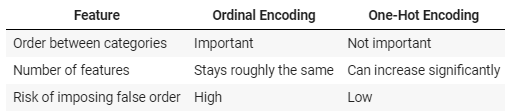

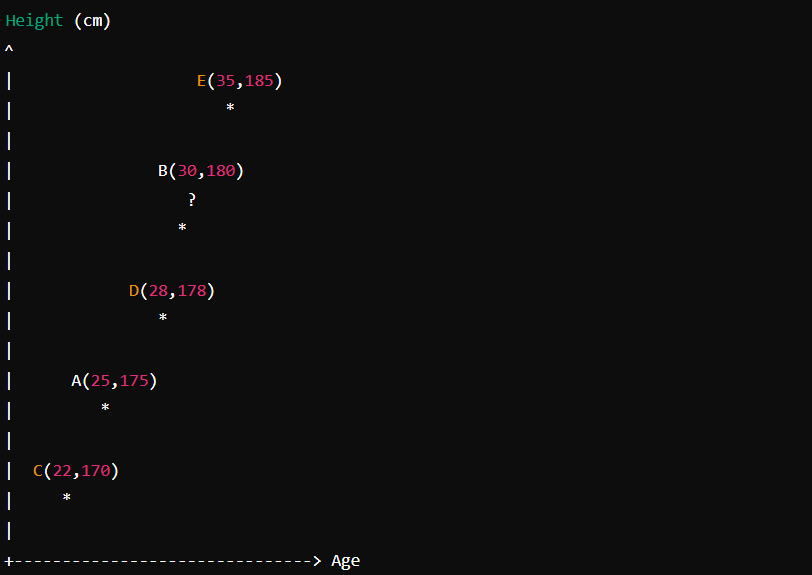

- Each '*' represents a person with known Weight.
- '?' represents Person B with missing Weight.
Steps Visualized:

- Person B (?) is missing Weight.
- We calculate distances to other known points.
Person D () is the closest neighbor, followed by Person A ().
-We use the Weights of Person D (72 kg) and Person A (70 kg) to estimate Person B's Weight as 71 kg.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.impute import KNNImputer, SimpleImputer

# Assuming df is your DataFrame
df_imputeKNN = clean_names(df)

# Identify categorical and numerical columns
categorical_cols = df_imputeKNN.select_dtypes(include=['object']).columns
numeric_cols = df_imputeKNN.select_dtypes(include=[np.number]).columns

# Impute numerical columns with KNNImputer
numeric_imputer = KNNImputer(n_neighbors=5)
df_imputeKNN[numeric_cols] = numeric_imputer.fit_transform(df_imputeKNN[numeric_cols])

# Impute categorical columns with SimpleImputer
categorical_imputer = SimpleImputer(strategy='most_frequent')
df_imputeKNN[categorical_cols] = categorical_imputer.fit_transform(df_imputeKNN[categorical_cols])

df_imputeKNN.iloc[[1207,1226],:]

In [ ]:
comparison_df = pd.DataFrame({
    'Median imputed': dfClean['price_euro'].median(),
    'Mean Imputed': dfClean['price_euro'].mean(),
    'KNN Imputed': df_imputeKNN.iloc[1226,]
}, index=['price_euro'])

comparison_df

 We **should scale your features before using the KNNImputer**. Scaling is important because the K-Nearest Neighbors (KNN) algorithm relies on distance calculations to find the nearest neighbors.
 If our features are on different scales, features with larger scales can dominate the distance calculations, which may lead to biased imputations

Why Scaling Is Important Before KNNImputer
Distance-Based Method:

- The KNNImputer uses algorithms similar to KNN classifiers or regressors, which calculate the distance between data points.
Common distance metrics (like Euclidean distance) are sensitive to the scale of the features.

- Feature Influence:Features with larger numeric ranges can disproportionately influence the distance calculation.
This can cause the imputer to consider neighbors based more on the larger-scaled features, ignoring smaller-scaled features.
Improved Imputation Accuracy:

- Scaling ensures that all features contribute equally to the distance computation.
Leads to more accurate and reliable imputations.

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
# Assuming df is your DataFrame
df_imputeKNN_standard=df.copy()
df_imputeKNN_standard = clean_names(df_imputeKNN_standard)

# Identify categorical and numerical columns
categorical_cols = df_imputeKNN_standard.select_dtypes(include=['object']).columns
numeric_cols = df_imputeKNN_standard.select_dtypes(include=[np.number]).columns

# Impute categorical columns with SimpleImputer
categorical_imputer = SimpleImputer(strategy='most_frequent')
df_imputeKNN_standard[categorical_cols] = categorical_imputer.fit_transform(df_imputeKNN_standard[categorical_cols])


# Scale numerical columns
scaler = StandardScaler()
df_imputeKNN_standard[numeric_cols] = scaler.fit_transform(df_imputeKNN_standard[numeric_cols])

df_imputeKNN_standard.head()

**Robust scaler**

*Standard Scaling*: Uses mean and standard deviation.

*Robust Scaling*: Uses median and interquartile range.

In [ ]:
from sklearn.preprocessing import RobustScaler

df_imputeKNN_robust=df.copy()

df_imputeKNN_robust = clean_names(df_imputeKNN_robust)

# Identify categorical and numerical columns
categorical_cols = df_imputeKNN_robust.select_dtypes(include=['object']).columns
numeric_cols = df_imputeKNN_robust.select_dtypes(include=[np.number]).columns

# Impute categorical columns with SimpleImputer
categorical_imputer = SimpleImputer(strategy='most_frequent')
df_imputeKNN_robust[categorical_cols] = categorical_imputer.fit_transform(df_imputeKNN_robust[categorical_cols])


robust_scaler=RobustScaler()

df_imputeKNN_robust[numeric_cols] = robust_scaler.fit_transform(df_imputeKNN_robust[numeric_cols])

df_imputeKNN_robust.head()

**Displaying 2 df side by side**

In [ ]:
from IPython.display import HTML

df1_html = df_imputeKNN_standard[["weight_kg", "price_euro"]].head().to_html()
df2_html = df_imputeKNN_robust[["weight_kg", "price_euro"]].head().to_html()

display(HTML(f"""
<div style="display: flex; justify-content: space-around;">
    <div>{df1_html}</div>
    <div>{df2_html}</div>
</div>
"""))


### Using KNN on scaled dataframes to fill missing values

In [ ]:
import pandas as pd
from sklearn.impute import KNNImputer

numeric_imputer = KNNImputer(n_neighbors=5)


# Inverse transform the scaled numeric columns
df_imputeKNN_standard[numeric_cols] = pd.DataFrame(
    scaler.inverse_transform(df_imputeKNN_standard[numeric_cols]),
    columns=numeric_cols,
    index=df_imputeKNN_standard.index
)

df_imputeKNN_robust[numeric_cols] = pd.DataFrame(
    robust_scaler.inverse_transform(df_imputeKNN_robust[numeric_cols]),
    columns=numeric_cols,
    index=df_imputeKNN_robust.index
)


In [ ]:
comparison_df = pd.DataFrame({
    'Median imputed': dfClean['price_euro'].median(),
    'Mean Imputed': dfClean['price_euro'].mean(),
    'KNN Imputed without scaling': df_imputeKNN.iloc[1226,],
    'KNN Imputed with standard scaling': df_imputeKNN_standard.iloc[1226,],
    'KNN Imputed with robust scaling': df_imputeKNN_robust.iloc[1226,]
}, index=['price_euro'])

comparison_df

**In our case we only have a few price_euro missing data, thus the scaling doesnt influence the data distribution!**